### 1. Import needed packages for most common words analysis and visual presentation

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

### 2. Read merged CSV file

In [2]:
df = pd.read_csv('clean_data_+_data_pricing.csv')

### 3. Point out the most common words grouped by

In [8]:
#values = df.groupby('end_user')['content_nonstop'].apply(lambda x: Counter(" ".join(x).split()).most_common(30)).reset_index()
    #comment: values without a filter possibility

In [9]:
values = df[(df['sentiment'] == 'negative')].groupby('pay_per_use')['content_nonstop'].apply(lambda x: Counter(" ".join(x).split()).most_common(30)).reset_index()
    #comment: values with a filter possibility -> [df['sentiment'] == 'positive/negative'] for filter

In [ ]:
#values = df[(df['sentiment'] == 'positive')].groupby(['freemium', 'subscription_flatrate'])['content_nonstop'].apply(lambda x: Counter(" ".join(x).split()).most_common(30)).reset_index()
    #comment: values with a filter possibility and grouped by 2 columns (i.e. 'freemium' and 'subscription_flatrate')

### 4. Visuel presentation as barplot and save as JPG file

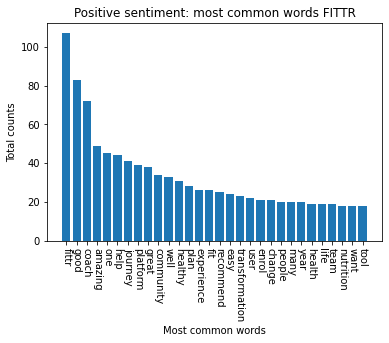

In [7]:
no_ads = values.iloc[1]['content_nonstop']          # iloc[+number]; number = row you want to select from dataframe values
plt.bar([i[0] for i in no_ads], height=[i[1] for i in no_ads])
plt.xticks(rotation=270, horizontalalignment="center")
plt.xlabel("Most common words")
plt.ylabel("Total counts")
plt.title("Negative sentiment: most common words in apps using pay per use")
plt.savefig('- most common words in apps using pay per use.jpg', bbox_inches='tight', dpi=700)
plt.show()